# **Pemodelan Time Series untuk Prediksi Jumlah Penumpang Kereta Api PT. KAI untuk wilayah Jawa(Jabodetabek+Non Jabodetabek)**

## **Deployment**

https://ikbar.pythonanywhere.com/

## **Perhitungan Manual**

https://docs.google.com/spreadsheets/d/1R2yATvyIomKn8J-tyMfsaj8CcAJboMY3GKUs0nDxoSs/edit?usp=sharing

## **Pendahuluan**

### Latar Belakang

PT Kereta Api Indonesia (PT. KAI) merupakan perusahaan transportasi nasional yang berperan penting dalam memobilisasi masyarakat dan barang di seluruh Indonesia. Untuk menghadapi tantangan operasional seperti fluktuasi jumlah penumpang yang dipengaruhi oleh faktor musiman, ekonomi, dan kebijakan pemerintah, PT. KAI perlu memanfaatkan teknologi prediksi guna meningkatkan efisiensi dan kualitas pelayanan. Proyek ini berfokus pada pemodelan time series untuk memprediksi jumlah penumpang di masa mendatang, sehingga membantu PT. KAI dalam pengambilan keputusan yang lebih tepat dan strategis.

Visi PT. KAI adalah menjadi penyedia jasa perkeretaapian terbaik yang berfokus pada layanan pelanggan, efisiensi, dan kontribusi pada ekonomi nasional. Dengan misi untuk menyediakan layanan transportasi yang aman, nyaman, dan efisien, PT. KAI mengadopsi strategi bisnis berbasis digitalisasi dan optimasi kapasitas guna meningkatkan layanan pelanggan dan mengurangi biaya operasional. Proyek prediksi ini bertujuan untuk memberikan pemahaman lebih baik terhadap pola penumpang dan mendukung pengambilan keputusan dalam hal pengoperasian kereta api.

Tujuan utama dari proyek ini adalah untuk membuat model yang memiliki akurasi tinggi dan juga dapat memprediksi jumlah penumpang yang akurat meskipun hanya memiliki beda nilai sedikit.

### Pernyataan Masalah

1. Bagaimana cara untuk membangun model yang akurat dalam memprediksi jumlah penumpang kereta api di bulan depan?

### Tujuan

Penelitian ini bertujuan untuk
melakukan peramalan penumpang Kereta
api menggunakan metode time series sehingga
dapat dilakukan penyesuaian kapasitas
layanan sesuai kebutuhan dengan harapan
dapat meningkatkan kepuasan pengguna
layanan sekaligus tingkat keuntungan dari
penyelenggara jasa layanan Kereta api.

## Pengumpulan Data

Data ini saya ambil melalui website Badan Pusat Statistik, pengambilan data dilakukan dari tahun 2006 hingga tahun 2024 untuk keperluan analisis tren dan pola yang dapat digunakan sebagai acuan dalam pengambilan keputusan serta perencanaan yang lebih efektif di masa mendatang.

In [ ]:
#import library
import pandas as pd

# Load data
raw_df = pd.read_csv('https://raw.githubusercontent.com/IkbarIbrahim/datascience/refs/heads/main/dataKeretaApi(2006-2024).csv')
pd.options.display.float_format = '{:.0f}'.format
raw_df

,Month,PassengerCount
0,2024-08,34666
1,2024-07,36640
2,2024-06,33832
3,2024-05,33964
4,2024-04,33554
...,...,...
219,2006-05,13312
220,2006-04,12657
221,2006-03,13066
222,2006-02,11705


## Plotting Data

In [ ]:
df = raw_df[['Month', 'PassengerCount']]
df['Month'] = pd.to_datetime(df['Month'], dayfirst=True, format='%Y-%m').dt.date
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2006-01-01 to 2024-08-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PassengerCount  224 non-null    int64
dtypes: int64(1)
memory usage: 3.5 KB


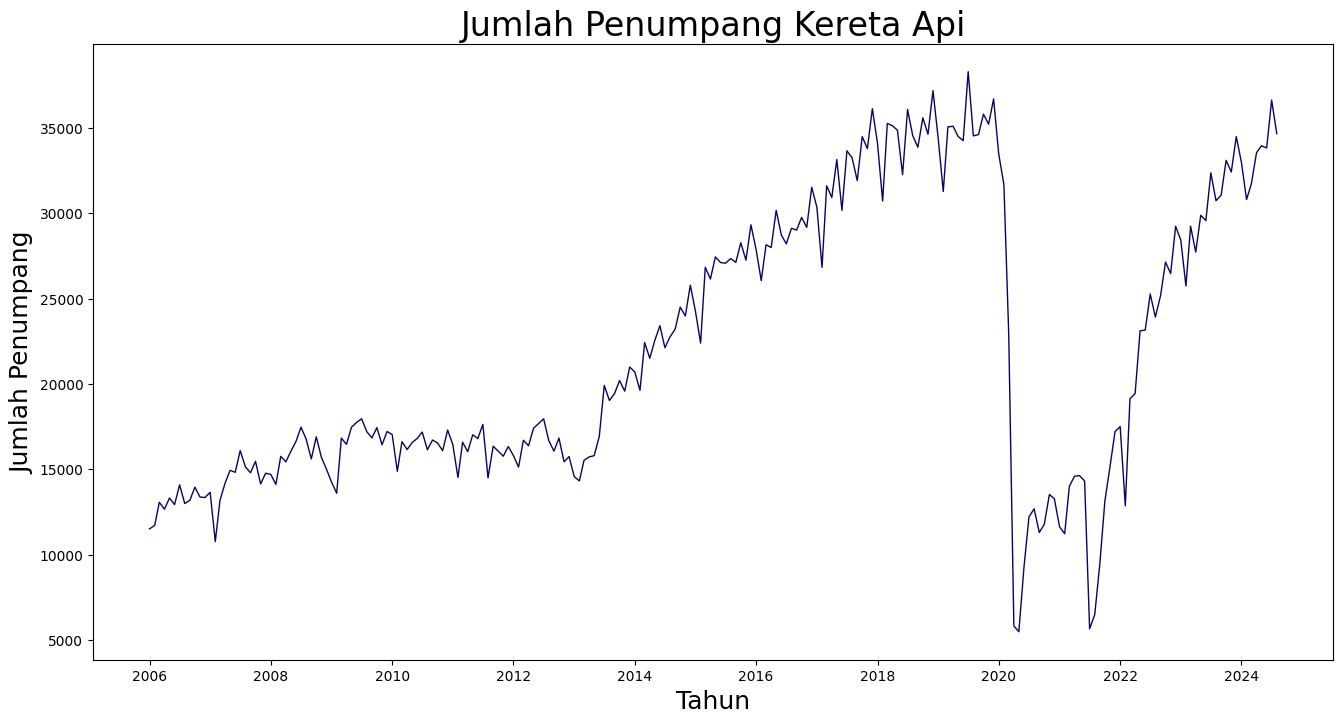

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Jumlah Penumpang Kereta Api", fontsize=24)
plt.ylabel('Jumlah Penumpang', fontsize=18)
plt.xlabel('Tahun', fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df['PassengerCount'], linewidth=1.0, dashes=False, ax=ax1)
plt.show()

## Preprocessing Data


### Normalisasi Data

In [ ]:
import numpy as np

def normalize(df):
    from sklearn.preprocessing import RobustScaler, MinMaxScaler

    np_data_unscaled = np.array(df)
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(np_data_unscaled)
    normalized_df = pd.DataFrame(np_data_scaled, columns=df.columns, index=df.index)
    pd.set_option('display.float_format', '{:.4f}'.format)
    return normalized_df, scaler

normalized_df, scaler = normalize(df)
normalized_df

,PassengerCount
Month,
2006-01-01,0.1836
2006-02-01,0.1898
2006-03-01,0.2312
2006-04-01,0.2188
2006-05-01,0.2387
...,...
2024-04-01,0.8553
2024-05-01,0.8678
2024-06-01,0.8638


### Sliding Window

In [ ]:
def sliding_window(data, lag):
    series = data['PassengerCount']
    result = pd.DataFrame()
    for l in lag:
        result[f'xt-{l}'] = series.shift(l)

    result['xt'] = series[l:]
    result = result.dropna()
    result.index = series.index[l:]  # Mengatur index sesuai dengan nilai lag
    return result

windowed_data = sliding_window(normalized_df, [1, 2, 3])
windowed_data = windowed_data[['xt', 'xt-1', 'xt-2', 'xt-3']]
windowed_data

,xt,xt-1,xt-2,xt-3
Month,,,,
2006-04-01,0.2188,0.2312,0.1898,0.1836
2006-05-01,0.2387,0.2188,0.2312,0.1898
2006-06-01,0.2270,0.2387,0.2188,0.2312
2006-07-01,0.2623,0.2270,0.2387,0.2188
2006-08-01,0.2289,0.2623,0.2270,0.2387
...,...,...,...,...
2024-04-01,0.8553,0.8001,0.7717,0.8383
2024-05-01,0.8678,0.8553,0.8001,0.7717
2024-06-01,0.8638,0.8678,0.8553,0.8001


In [ ]:
windowed_data.to_csv("windowed_data.csv", index=False)


### Splitting Data

In [ ]:
def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)

    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]

    return x_train, y_train, x_test, y_test

input_df = windowed_data[['xt-1', 'xt-2', 'xt-3']]
target_df = windowed_data[['xt']]

x_train, y_train, x_test, y_test = split_data(input_df, target_df, 0.8)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (176, 3)
y_train shape: (176, 1)
X_test shape: (45, 3)
y_test shape: (45, 1)


## Modelling

### Regresi Linear tanpa Ensemble Bagging

#### Rumus Regresi Linear

Regresi linear dapat dinyatakan dengan rumus:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

di mana:
- $y$ adalah variabel dependen (target).
- $\beta_0$ adalah intercept (konstanta).
- $\beta_1, \beta_2, \ldots, \beta_n$ adalah koefisien regresi untuk masing-masing variabel independen $x_1, x_2, \ldots, x_n$.
- $\epsilon$ adalah error atau residual.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

### Metrik Evaluasi Model

#### 1. MSE (Mean Squared Error)
- *Definisi*: MSE adalah rata-rata dari kuadrat selisih antara nilai yang diprediksi dan nilai aktual.
- *Rumus*:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  Di mana $y_i$ adalah nilai aktual, $\hat{y}_i$ adalah nilai prediksi, dan $n$ adalah jumlah data.

#### 2. RMSE (Root Mean Squared Error)
- *Definisi*: RMSE adalah akar kuadrat dari MSE, yang mengembalikan satuan ke skala yang sama dengan data asli.
- *Rumus*:
  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

#### 3. MAPE (Mean Absolute Percentage Error)
- *Definisi*: MAPE mengukur kesalahan dalam prediksi sebagai persentase dari nilai aktual.
- *Rumus*:
  $$
  \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%
  $$

In [ ]:
# Melakukan prediksi
y_pred = linear_model.predict(x_test)

# Menghitung error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, " %")

Mean Squared Error (MSE): 0.005810195250019502
Root Mean Squared Error (RMSE): 0.0762246367654153
Mean Absolute Percentage Error (MAPE): 1.2948548033011096  %


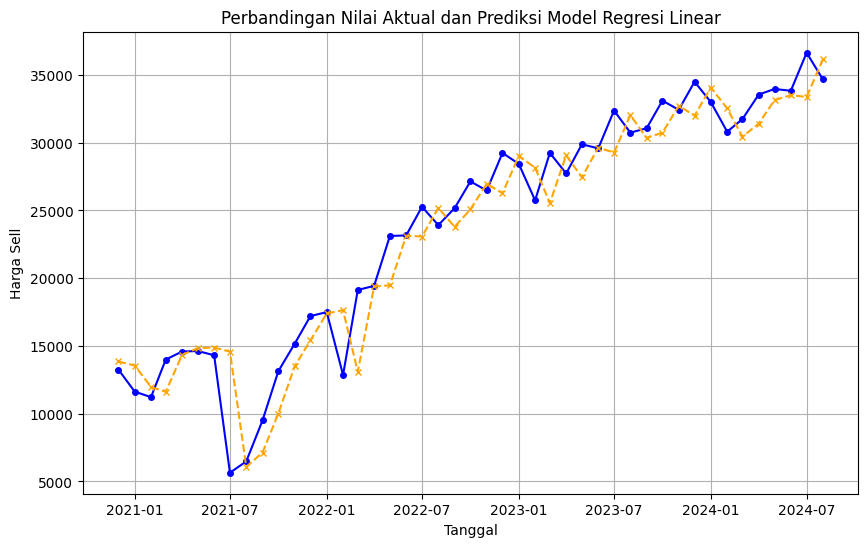

In [ ]:
# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, scaler.inverse_transform(y_test.values.reshape(-1, 1)), label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Harga Sell')
plt.grid()
plt.show()

In [ ]:
# Mendapatkan nilai prediksi dari model linear
last_row = windowed_data.iloc[-1][['xt-1', 'xt-2', 'xt-3']].values.reshape(1, -1)
predicted_value_normalized = linear_model.predict(last_row)
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Mendapatkan jumlah penumpang bulan ini
last_passenger_count = scaler.inverse_transform(normalized_df[['PassengerCount']].iloc[-1].values.reshape(-1, 1))

# Menghitung persentase perubahan
percentage_change = ((predicted_value[0][0] - last_passenger_count[0][0]) / last_passenger_count[0][0]) * 100

# Menentukan tanda positif atau negatif untuk perubahan
change_sign = '+' if percentage_change > 0 else ''

# Menampilkan output tanpa pemisah
print(f'Jumlah penumpang bulan ini: {int(last_passenger_count[0][0])}')
print(f'Prediksi jumlah penumpang untuk bulan esok: {int(predicted_value[0][0])} ({change_sign}{percentage_change:.2f}%)')


Jumlah penumpang bulan ini: 34666
Prediksi jumlah penumpang untuk bulan esok: 36143 (+4.26%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

x_train_lstm = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

lstm_model.fit(x_train_lstm, y_train, epochs=20, batch_size=32)

# Prediksi data uji
y_pred = lstm_model.predict(x_test_lstm)

# Hitung MSE
mse = mean_squared_error(y_test, y_pred)

# Hitung RMSE
rmse = np.sqrt(mse)

# Hitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3207
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2996  
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2536 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2306 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1836  
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1824 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1590  
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1418 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1170  
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0939 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735  
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604  
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0334 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Regresi Linear dengan Ensemble Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
base_model = LinearRegression()
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=10, bootstrap=True)
bagging_model.fit(x_train, y_train)
y_pred_lstm = bagging_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_lstm)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_lstm)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

Mean Squared Error: 0.005698585572135861
Root Mean Squared Error: 0.07548897649416013
Mean Absolute Percentage Error (MAPE): 1.2949478448392506 %


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


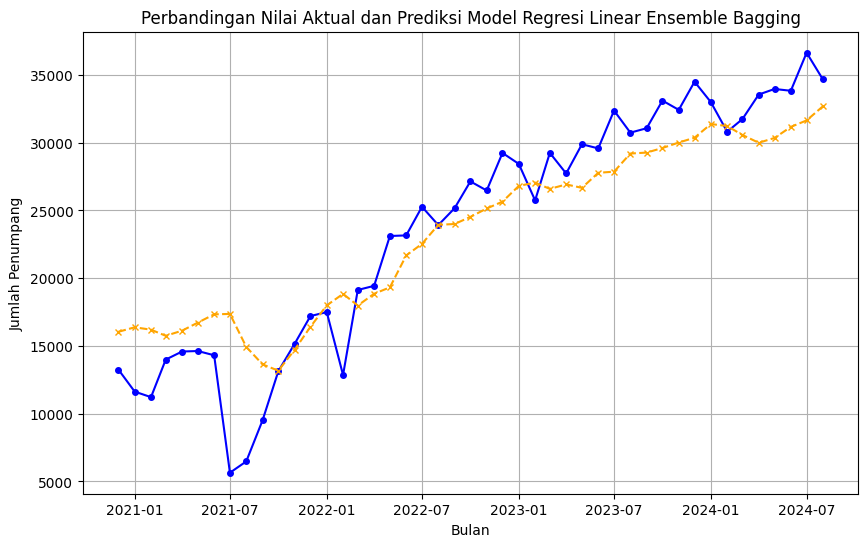

In [ ]:
# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, scaler.inverse_transform(y_test.values.reshape(-1, 1)), label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Regresi Linear Ensemble Bagging')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.grid()
plt.show()

In [ ]:
last_row = windowed_data.iloc[-1][['xt-1', 'xt-2', 'xt-3']].values.reshape(1, -1)
predicted_value_normalized = bagging_model.predict(last_row)
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1)).round().astype(int)
last_count = scaler.inverse_transform(normalized_df[['PassengerCount']].iloc[-1].values.reshape(-1, 1)).round().astype(int)
percentage_change = ((predicted_value[0][0] - last_count[0][0]) / last_count[0][0]) * 100

if percentage_change > 0:
    change_sign = '+'
else:
    change_sign = ''

print(f'Jumlah penumpang bulan ini: {last_count[0][0]}')
print(f'Prediksi jumlah penumpang untuk bulan depan: {predicted_value[0][0]} ({change_sign}{percentage_change:.2f}%)')


Jumlah penumpang bulan ini: 34666
Prediksi jumlah penumpang untuk bulan depan: 36295 (+4.70%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


### Grid Search

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def grid_search(input_df, target_df, splits, estimators, bootstrap, max_samples):
    best_rmse = float('inf')
    best_params = None
    i = 0
    for split in splits:
        x_train, y_train, x_test, y_test = split_data(input_df, target_df, split)
        for estimator in estimators:
            for bootstrap in bootstraps:
                for max_sample in max_samples:
                    base_model = LinearRegression()
                    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=estimator, bootstrap=bootstrap, max_samples=max_sample)
                    bagging_model.fit(x_train, y_train.values.ravel())
                    y_pred = bagging_model.predict(x_test)
                    i+=1
                    current_rmse = rmse(y_test, y_pred)
                    #print(f'Model {i} split: {split}, estimator: {estimator}, bootstrap: {bootstrap}, max sample: {max_sample}, RMSE: {current_rmse}')
                    if current_rmse < best_rmse:
                        best_rmse = current_rmse
                        best_mse = mean_squared_error(y_test, y_pred)
                        best_mape = mean_absolute_percentage_error(y_test, y_pred)
                        best_model = bagging_model
                        best_params = {'estimator': estimator, 'bootstrap': bootstrap, 'train_sample': split, 'max_sample': max_sample}
                        y_test = y_test
                        y_pred = y_pred
    return best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred

# Parameter untuk Grid Search
splits = [0.7, 0.75, 0.8, 0.85, 0.9]
estimators = [10, 20, 50, 100]
bootstraps = [True, False]
max_samples = [0.8, 0.9, 1.0]

best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred = grid_search(input_df, target_df, splits, estimators, bootstraps, max_samples)

Dari 120 model, didapatkan model terbaik dengan parameter berikut

In [ ]:
# Parameter terbaik
print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Best MSE: {"{:.20f}".format(best_mse)}')
print(f'Best MAPE: {best_mape}')

Best parameters: {'estimator': 100, 'bootstrap': True, 'train_sample': 0.9, 'max_sample': 0.9}
Best RMSE: 0.057944524701572755
Best MSE: 0.00335756794289117540
Best MAPE: 0.06310898171838603


In [ ]:
import pickle

# Menyimpan model terbaik ke file
with open('best_bagging_model.sav', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model terbaik berhasil disimpan sebagai 'best_bagging_model.sav'")


Model terbaik berhasil disimpan sebagai 'best_bagging_model.sav'


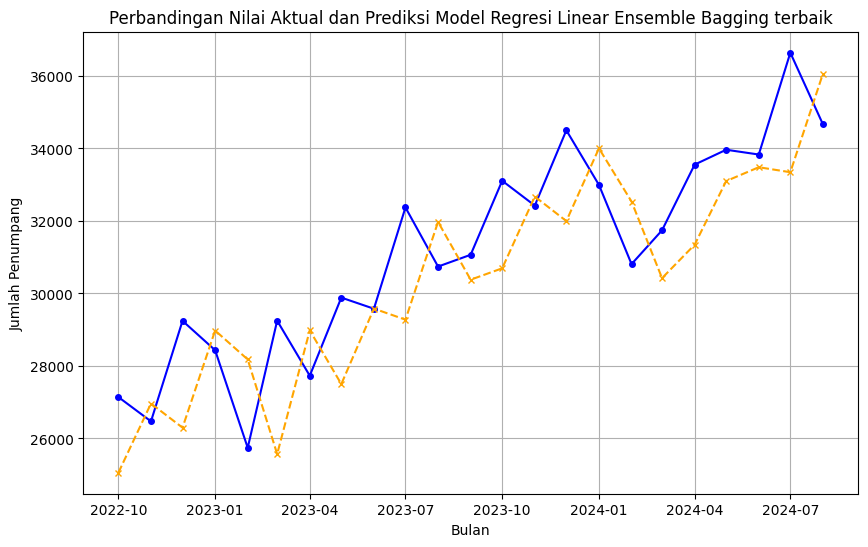

In [ ]:
# Membuat grafik perbandingan
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, scaler.inverse_transform(y_test.values.reshape(-1, 1)), label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Regresi Linear Ensemble Bagging terbaik')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.grid()
plt.show()

### Uji Coba

In [ ]:
import numpy as np
import pandas as pd

# Example data for the last three months of passenger counts
sell_1 = 34666  # Passenger count for this month
sell_2 = 36640  # Passenger count for 1 month ago
sell_3 = 33832  # Passenger count for 2 months ago

# Transforming the values using scaler (assuming scaler is predefined)
last_row = np.array([
    scaler.transform([[sell_1]]).flatten()[0],
    scaler.transform([[sell_2]]).flatten()[0],
    scaler.transform([[sell_3]]).flatten()[0]
]).reshape(1, -1)

last_row_df = pd.DataFrame(last_row, columns=['xt-1', 'xt-2', 'xt-3'])

# Predicting passenger count
predicted_value_normalized = best_model.predict(last_row_df)
predicted_value = scaler.inverse_transform(predicted_value_normalized.reshape(-1, 1))

# Calculating percentage change
last_count = sell_1
percentage_change = ((predicted_value[0][0] - last_count) / last_count) * 100
change_sign = '+' if percentage_change > 0 else ''

# Output the result without any formatting
print(f'Jumlah penumpang bulan ini: {int(last_count)}')
print(f'Prediksi jumlah penumpang untuk bulan depan: {int(predicted_value[0][0])} ({change_sign}{percentage_change:.2f}%)')


Jumlah penumpang bulan ini: 34666
Prediksi jumlah penumpang untuk bulan depan: 34343 (-0.93%)


## Simpan Model

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

# Misalkan X_train adalah data fitur untuk pelatihan
scaler = StandardScaler()
scaler.fit(x_train)  # Melatih scaler hanya pada X_train

# Simpan scaler ke file
with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Scaler berhasil disimpan sebagai 'scaler.sav'")


Scaler berhasil disimpan sebagai 'scaler.sav'


In [ ]:
scaler

StandardScaler()

## Deployment

https://huggingface.co/spaces/bram4627/prediksi-jumlah-penumpang